<a href="https://colab.research.google.com/github/AnnJungChan/youngjin_TECH/blob/main/DATA_PLOT/time_series_with_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지로딩

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import easydict
from tqdm.notebook import trange, tqdm
from torch.utils.data import DataLoader, Dataset
!pip install celluloid
from celluloid import Camera
import pandas as pd
import pickle
from typing import List
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 데이터로딩

In [169]:
origin=pd.read_csv('/content/gdrive/MyDrive/용접데이터/one_data.csv')

In [183]:
one_data = origin.loc[origin['공정명'] == 'PLASMA W/D 1호기'	,:]
one_data=one_data.sort_values(by = "시간")
one_data=one_data.reset_index()
one_data.drop(columns = ['Unnamed: 0', '공정명'],inplace =True)
one_data.rename(columns = {'생산량' : 'sensor_supply','시간' : 'time', '전류.A.':'sensor_current','전압.V.':'sensor_voltage','가스.l.min.':'sensor_gas','용접시간.sec.':'sensor_sec','판단':'state','팁누적개수':'sensor_tip', 'NUM.EA.':'sensor_ea'},inplace = True)
one_data = one_data[['time','sensor_supply','sensor_current','sensor_voltage','sensor_gas','sensor_sec','sensor_tip','sensor_ea','state']]
df = one_data
df['time']=one_data['time'].astype("datetime64")

# 플랏팅

In [189]:
def plot_sensor(temp_df,var_name) :
  fig = plt.figure(figsize = (30,10))
  ax = plt.subplot(111)

  labels = temp_df['state'].values.tolist()
  dates = temp_df['time'].index

  temp_df[var_name].plot(ax=ax)
  ax.legend([var_name], loc = 'upper right')

  temp_start = dates[0] #인덱스 0번에서부터 시작
  temp_date = dates[0] # dates 0번에서 시작
  temp_label = labels[0] # 라벌 또한 0번에서 시작

  for xc, value in zip(dates, labels):
            if temp_label != value:
                if temp_label == "NG_(T)(Tip)":
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='cyan')
                if temp_label == "NG_(Tip)":
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='black')
                if temp_label == 'NG_(A)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='magenta')
                if temp_label == 'NG_(A)(V)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='red')
                if temp_label == 'NG_(V)(Tip)':
                    ax.axvspan(temp_start, temp_date, alpha=0.2, color='yellow')
                temp_start=xc
                temp_label=value
            temp_date = xc

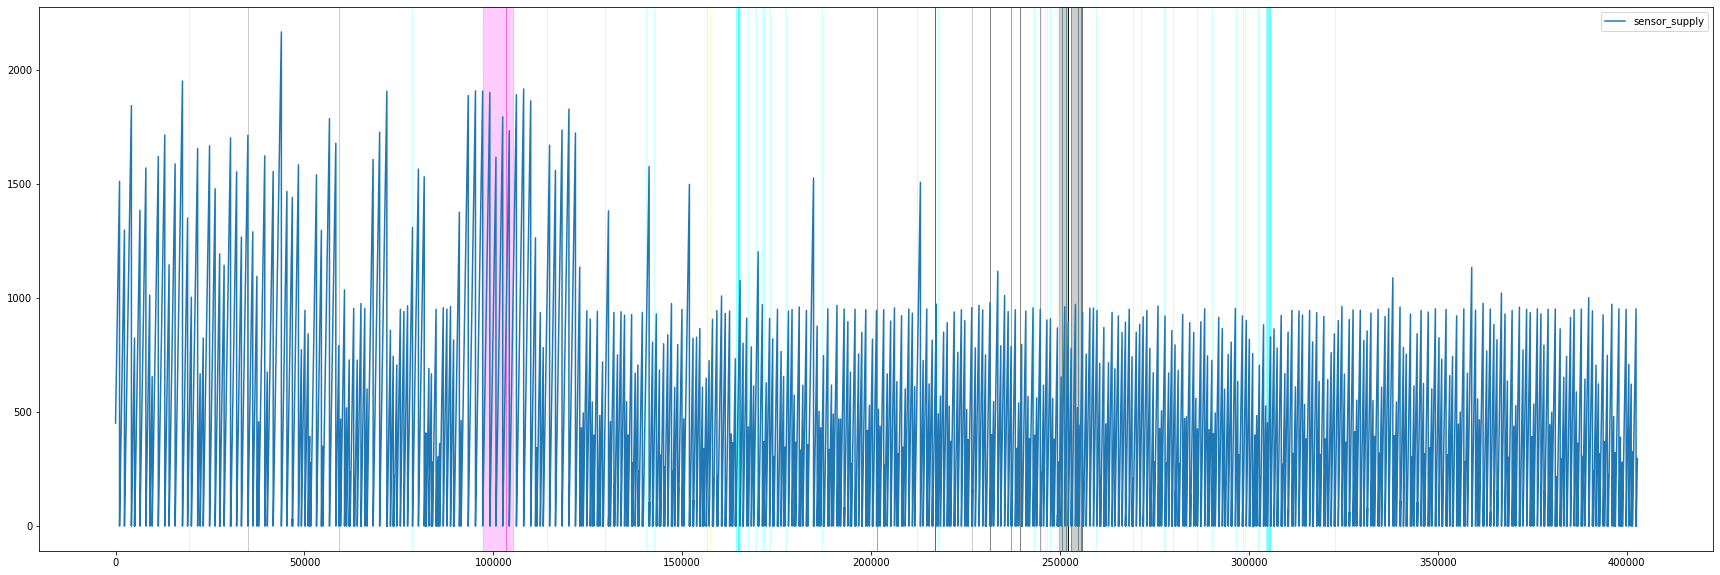

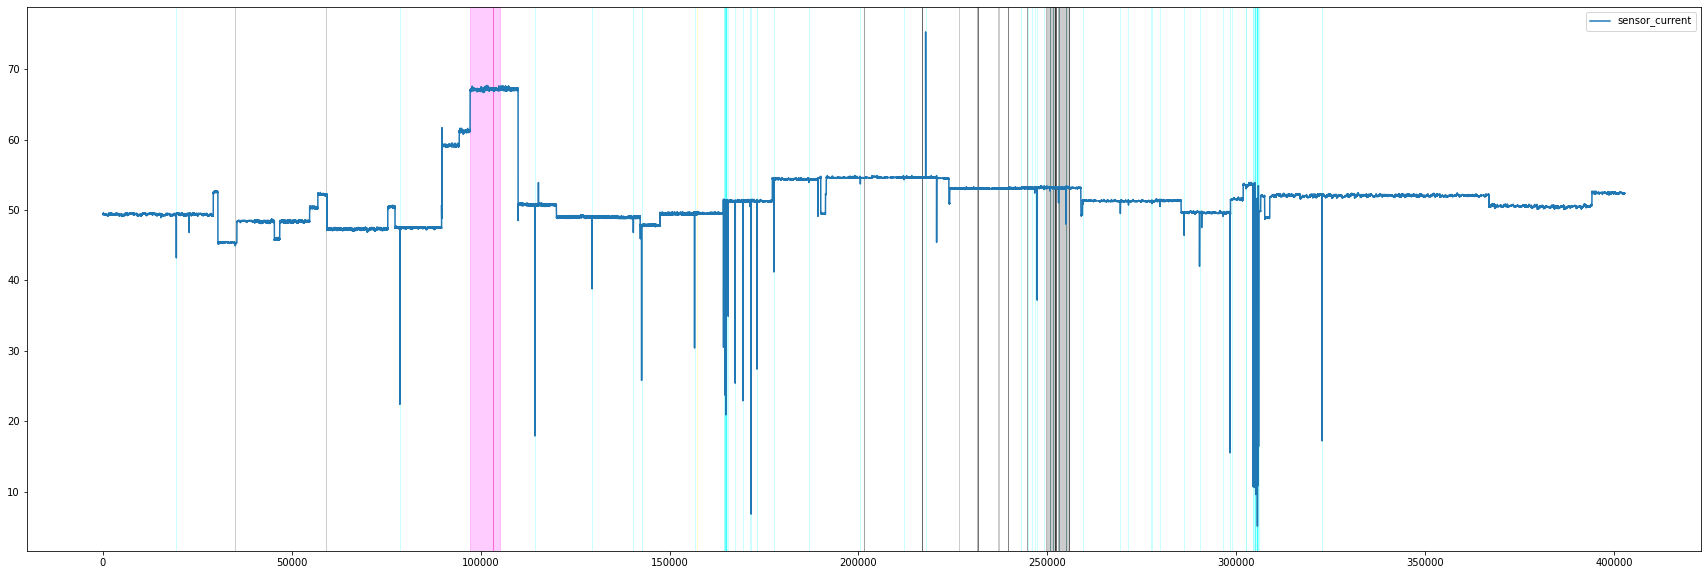

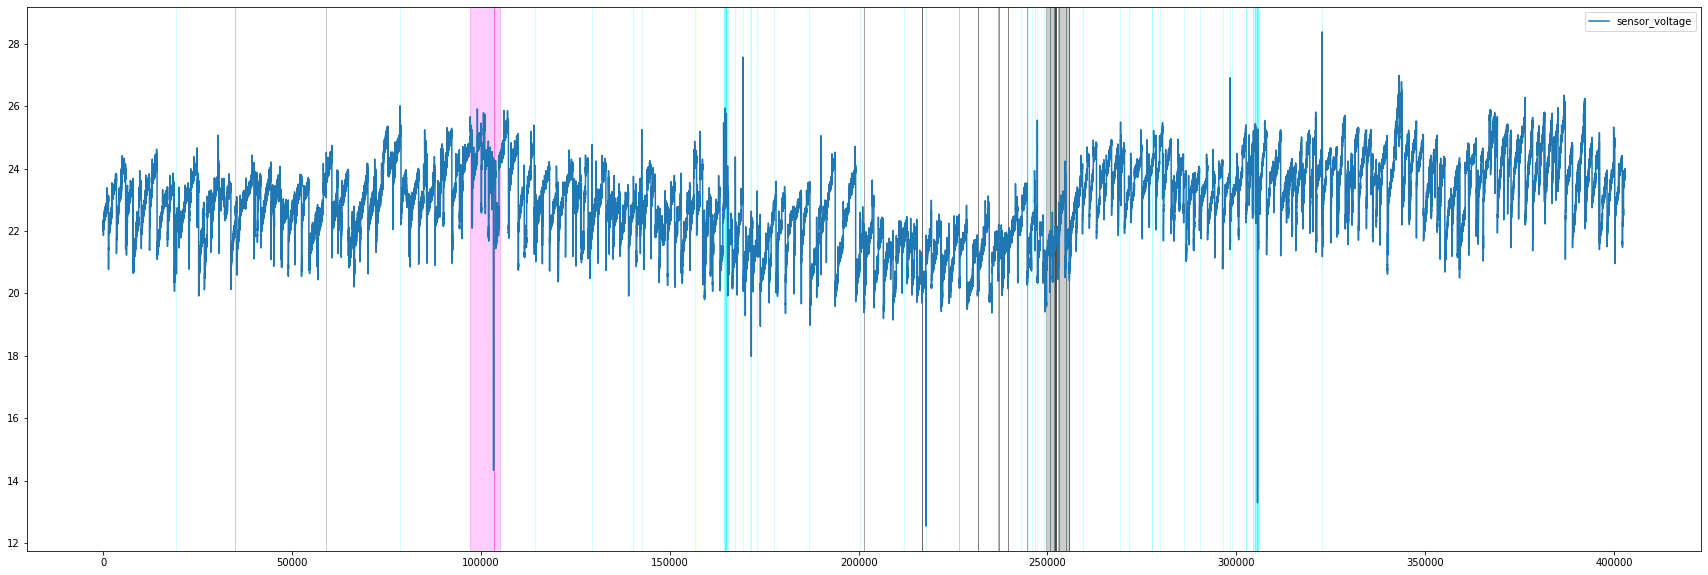

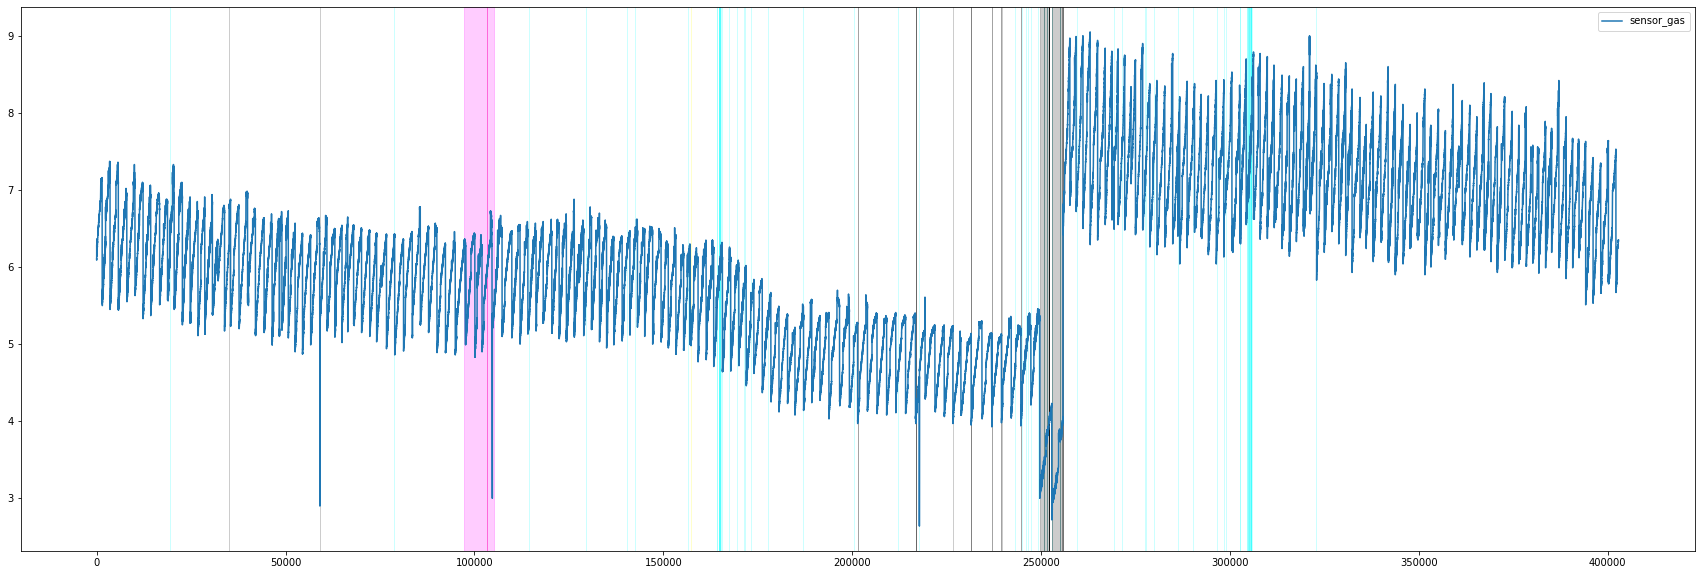

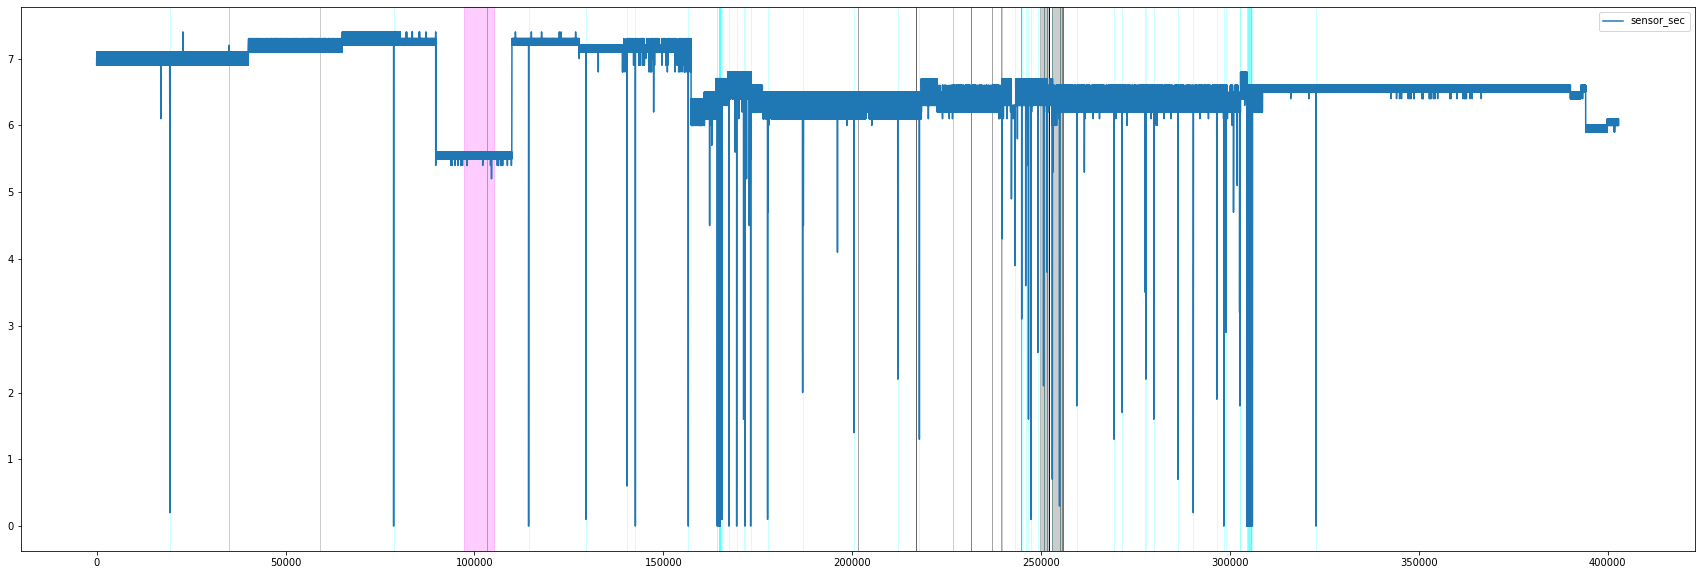

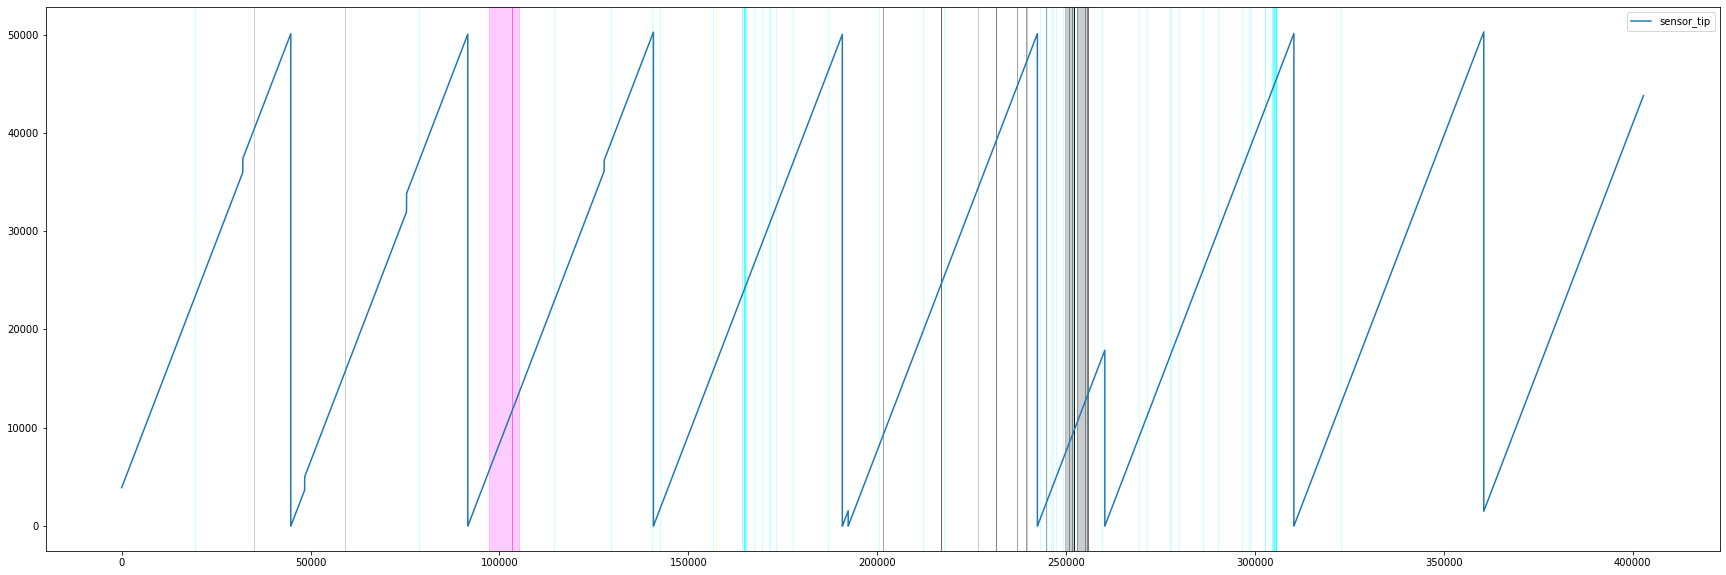

In [190]:
list_columns = ['sensor_supply','sensor_current','sensor_voltage','sensor_gas','sensor_sec','sensor_tip']
list_name = ['생산량', '전류', '전압','가스','용접시간','팁누적개수']
for i in range(len(list_columns)) : 
  plot_sensor(df,f'{list_columns[i]}')
  plt.savefig("1호기_1"+f'{list_name[i]}')